In [1]:
import pandas as pd 
df1 = pd.read_csv('/Users/macosx/Desktop/DRONE/interessant/DRONE_Data.csv')

ufo_cols = ['DATE', 'ENT/PER ', 'DRONE/VEH', 'PASSAGERS', 'FREQUENE', 'DEPART ', 'ARRIVE ', 'POIDS', 'DISTANCE',
            'FRAGILE', 'DANGEREUX', 'OBJECT', 'CONTRAT', 'PRIX']

df1.columns = ufo_cols
df1 = pd.read_csv('/Users/macosx/Desktop/DRONE/interessant/DRONE_Data.csv', names=ufo_cols, header=0)


In [2]:
df1.columns = df1.columns.str.strip()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df1.head()

,DATE,ENT/PER,DRONE/VEH,PASSAGERS,FREQUENE,DEPART,ARRIVE,POIDS,DISTANCE,FRAGILE,DANGEREUX,OBJECT,CONTRAT,PRIX
0,10/07/2020 16:36:09,Personne,DRONE AUTONOME,1,3,Agdal,hay riad rabat,10,5-10km,NON,NON,NaN,POSSIBLE,15.0
1,10/07/2020 18:21:26,Personne,DRONE AUTONOME,1,3,berrechid,paris,5,PLus Que 40 km,NON,NON,NaN,POSSIBLE,3.0
2,11/07/2020 01:51:53,Personne,DRONE AUTONOME,3,3,.,.,1,0-5km,NON,NON,NaN,POSSIBLE,2.0
3,11/07/2020 11:58:33,Personne,DRONE AUTONOME,3,2,Salmia 1 Rue 32 IMM 33 App 4 Casablanca,Rabat Lycee Abdkrim Khatabi,15,10-20 km,OUI,NON,NaN,OUI,15.0
4,21/07/2020 01:47:49,Personne,VÉHÉCULE ÉLÉCTRIQUE AUTONOME,2,5,Paris,Rabat,50,PLus Que 40 km,OUI,OUI,NaN,POSSIBLE,90.0


In [5]:
df1.DEPART

0                                       Agdal
1                                   berrechid
2                                           .
3     Salmia 1 Rue 32 IMM 33 App 4 Casablanca
4                                       Paris
5                                       RABAT
6                                       Rabat
7                                         Fes
8                                       Rabat
9                                      temara
10                                      Rabat
11                      Jabel ay ayachi rabat
12                                     Oujda 
13                                      Rabat
Name: DEPART, dtype: object

In [6]:

# longitude latitude
import pandas, os
import numpy as np
os.listdir()
import geopy

dir(geopy)
from geopy.geocoders import Nominatim

nom = Nominatim(user_agent='dounia.driff@gmail.com')
n = nom.geocode(" Casablanca")
print(n.latitude, n.longitude)
depart_latitude = []
depart_longitude = []
for adresse in df1['DEPART']:
    try:
        n = nom.geocode(adresse)
        depart_latitude.append(n.latitude)
        depart_longitude.append(n.longitude)

        print(depart_latitude, depart_longitude)
    except:
        print(None)

df1['cordinate_depart'] = df1['DEPART'].apply(nom.geocode)
df1['cordinate_arrive'] = df1['ARRIVE'].apply(nom.geocode)
df1['depart_latitude'] = df1['cordinate_depart'].apply(lambda x: x.latitude if x != None else None)
df1['depart_longitude'] = df1['cordinate_depart'].apply(lambda x: x.longitude if x != None else None)


df1['arrive_latitude'] = df1['cordinate_arrive'].apply(lambda x: x.latitude if x != None else None)
df1['arrive_longitude'] = df1['cordinate_arrive'].apply(lambda x: x.longitude if x != None else None)





33.5950627 -7.6187768
[30.0165226] [-9.3322735]
[30.0165226, 33.2676746] [-9.3322735, -7.5811465]
None
None
[30.0165226, 33.2676746, 48.8566969] [-9.3322735, -7.5811465, 2.3514616]
[30.0165226, 33.2676746, 48.8566969, 34.022405] [-9.3322735, -7.5811465, 2.3514616, -6.834543]
[30.0165226, 33.2676746, 48.8566969, 34.022405, 34.022405] [-9.3322735, -7.5811465, 2.3514616, -6.834543, -6.834543]
[30.0165226, 33.2676746, 48.8566969, 34.022405, 34.022405, 34.0346534] [-9.3322735, -7.5811465, 2.3514616, -6.834543, -6.834543, -5.0161926]
[30.0165226, 33.2676746, 48.8566969, 34.022405, 34.022405, 34.0346534, 34.022405] [-9.3322735, -7.5811465, 2.3514616, -6.834543, -6.834543, -5.0161926, -6.834543]
[30.0165226, 33.2676746, 48.8566969, 34.022405, 34.022405, 34.0346534, 34.022405, 33.917166] [-9.3322735, -7.5811465, 2.3514616, -6.834543, -6.834543, -5.0161926, -6.834543, -6.923804]
[30.0165226, 33.2676746, 48.8566969, 34.022405, 34.022405, 34.0346534, 34.022405, 33.917166, 34.022405] [-9.3322735, -

In [39]:
BBox = ((df1.depart_longitude.min(),df1.depart_longitude.max(),      
         df1.depart_latitude.min(), df1.depart_latitude.max()))

BBox1 = ((df1.arrive_longitude.min(),df1.arrive_longitude.max(),      
         df1.arrive_latitude.min(), df1.arrive_latitude.max()))

In [45]:
print(BBox)
print(BBox1)
(-7.5811465, 2.3514616, 33.2676746, 48.8566969)


(-7.5811465, 2.3514616, 33.2676746, 48.8566969)
(-9.55950887633639, 8.809348, 30.42203615, 48.8566969)


(-7.5811465, 2.3514616, 33.2676746, 48.8566969)

In [49]:
ruh_m = plt.imread('/Users/macosx/Desktop/DRONE/interessant/map_depart.png')

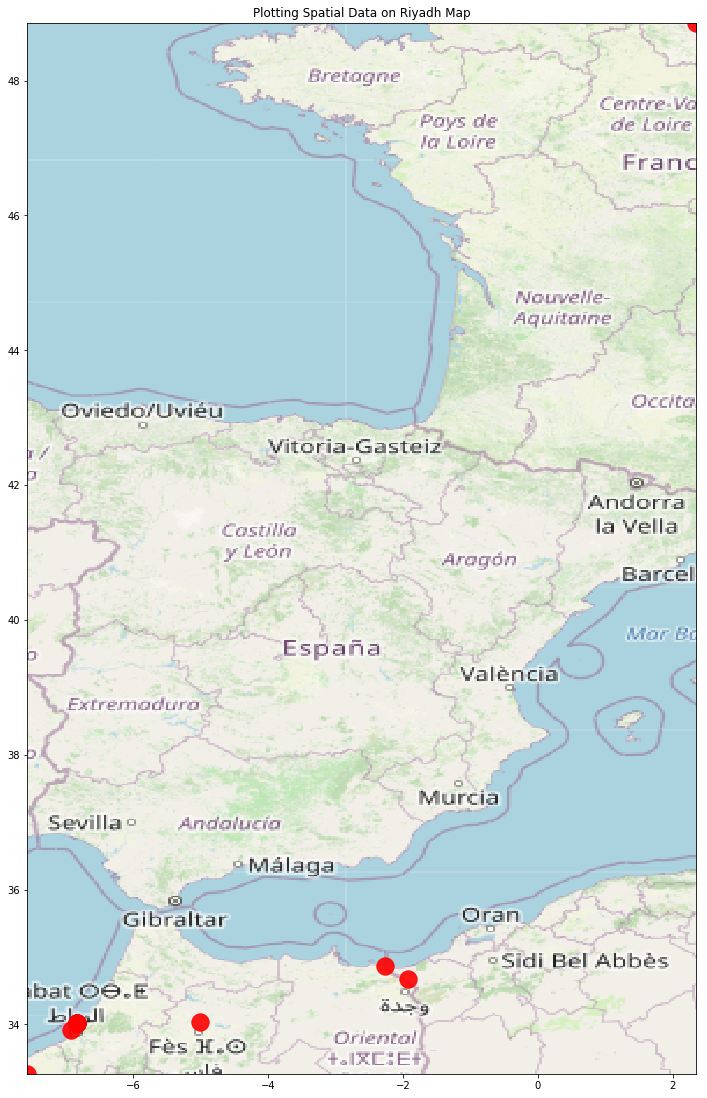

In [50]:

fig, ax = plt.subplots(figsize = (12,20))

ax.scatter(df1.depart_longitude, df1.depart_latitude,zorder=1, alpha= 0.9, c='red', s=300)



ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')





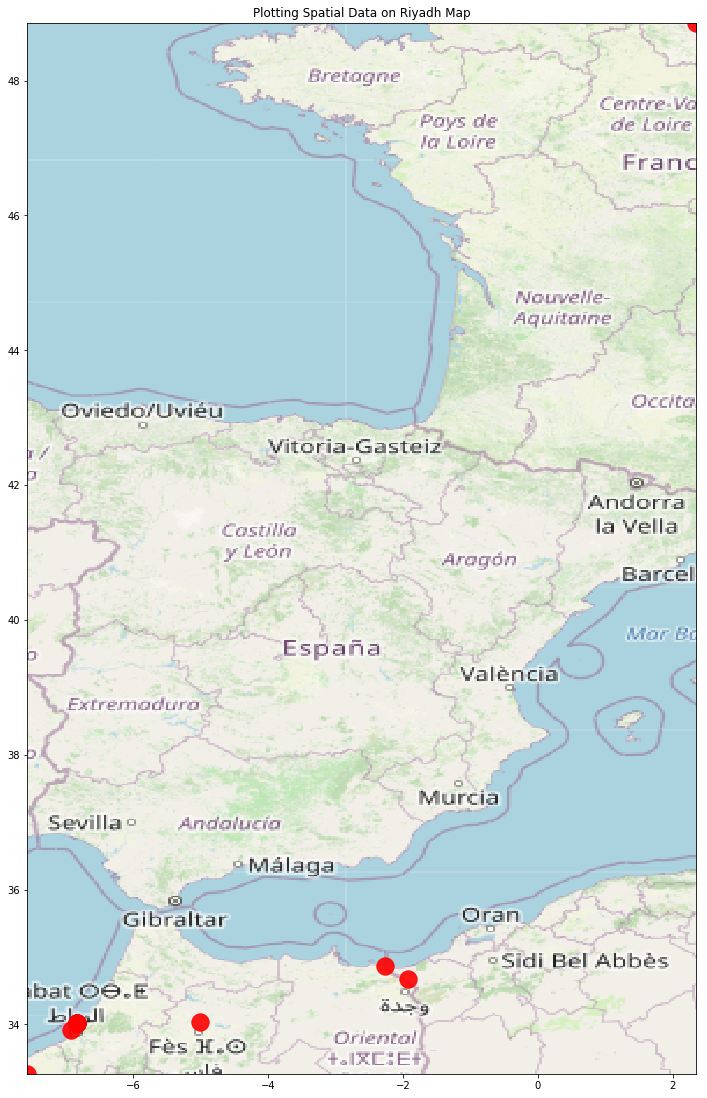

In [52]:






fig, ax = plt.subplots(figsize = (12,20))

ax.scatter(df1.depart_longitude, df1.depart_latitude,zorder=1, alpha= 0.9, c='red', s=300)
#ax.scatter(df1.arrive_longitude, df1.arrive_latitude,zorder=1, alpha= 0.9, c='black', s=200)



ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')





In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [60]:
df1.dropna(axis=0,how='any',subset=['depart_latitude','depart_longitude'],inplace=True)

In [61]:
# Variable with the Longitude and Latitude
X=df1.loc[:,['FREQUENE','depart_latitude','depart_longitude']]
X.head(10)

,FREQUENE,depart_latitude,depart_longitude
0,3,34.859967,-2.269656
1,3,33.267675,-7.581147
4,5,48.856697,2.351462
5,4,34.022405,-6.834543
6,3,34.022405,-6.834543
7,1,34.034653,-5.016193
8,7,34.022405,-6.834543
9,5,33.917166,-6.923804
10,7,34.022405,-6.834543
12,4,34.677874,-1.929306


In [74]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')

kmeans.fit(X[X.columns[0:2]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,FREQUENE,depart_latitude,depart_longitude,cluster_label
0,3,34.859967,-2.269656,3
1,3,33.267675,-7.581147,4
4,5,48.856697,2.351462,1
5,4,34.022405,-6.834543,2
6,3,34.022405,-6.834543,2
7,1,34.034653,-5.016193,0
8,7,34.022405,-6.834543,2
9,5,33.917166,-6.923804,2
10,7,34.022405,-6.834543,2
12,4,34.677874,-1.929306,3


/Users/macosx/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  """
/Users/macosx/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  """


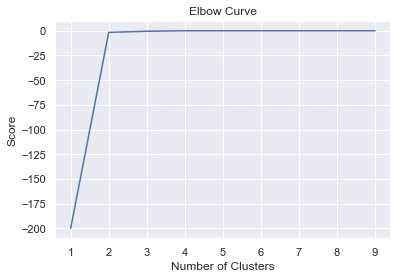

In [80]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df1[['depart_latitude']]
X_axis = df1[['depart_longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

KeyError: "None of [Float64Index([-6.895729845786563,          2.3514616,          -6.834543,\n                        8.809348,         -7.6187768,         -7.6187768,\n               -9.55950887633639,          -6.834543,  -9.55950887633639,\n                       2.3514616,         -7.6187768],\n             dtype='float64')] are in the [columns]"

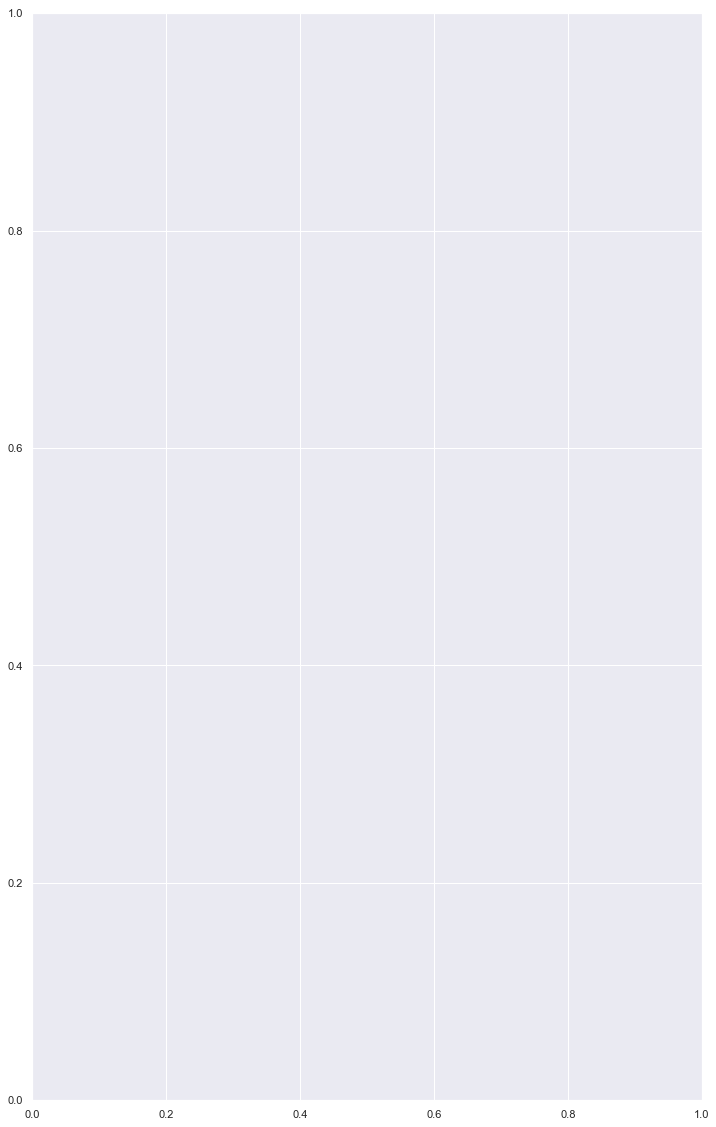

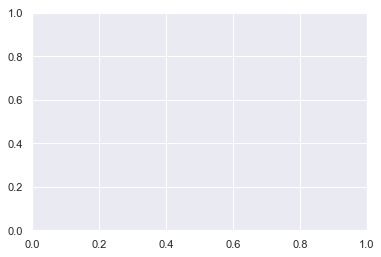

In [87]:

fig, ax = plt.subplots(figsize = (12,20))

X.plot.scatter(df1.arrive_longitude, df1.arrive_latitude,zorder=1, alpha= 0.9, c='black', s=200)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#ax.scatter(df1.arrive_longitude, df1.arrive_latitude,zorder=1, alpha= 0.9, c='black', s=200)



ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')


In [88]:
def map():
    BBox = ((df1.depart_longitude.min(),df1.depart_longitude.max(),      
         df1.depart_latitude.min(), df1.depart_latitude.max()))
    
    ruh_m = plt.imread('/Users/macosx/Desktop/DRONE/interessant/map_depart.png')
    
      

    fig, ax = plt.subplots(figsize = (12,20))

    ax.scatter(df1.depart_longitude, df1.depart_latitude,zorder=1, alpha= 0.9, c='red', s=300)
#ax.scatter(df1.arrive_longitude, df1.arrive_latitude,zorder=1, alpha= 0.9, c='black', s=200)



    ax.set_title('Plotting Spatial Data on Riyadh Map')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    return  (ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal'))

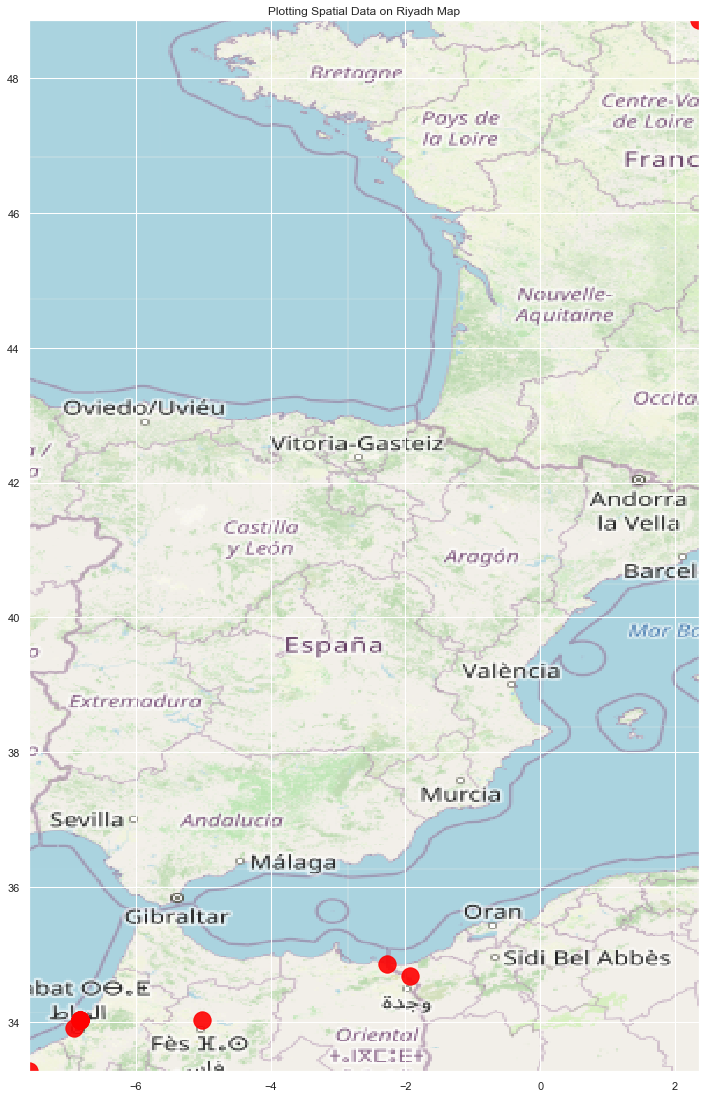

In [89]:
map()

In [90]:
import matplotlib.pyplot as plt
#map
def map():
    BBox = ((df1.depart_longitude.min(), df1.depart_longitude.max(),
             df1.depart_latitude.min(), df1.depart_latitude.max()))

    ruh_m = plt.imread('/Users/macosx/Desktop/DRONE/interessant/map_depart.png')

    fig, ax = plt.subplots(figsize=(12, 20))

    ax.scatter(df1.depart_longitude, df1.depart_latitude, zorder=1, alpha=0.9, c='red', s=300)
    # ax.scatter(df1.arrive_longitude, df1.arrive_latitude,zorder=1, alpha= 0.9, c='black', s=200)

    ax.set_title('Plotting Spatial Data on Riyadh Map')
    ax.set_xlim(BBox[0], BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    return (ax.imshow(ruh_m, zorder=0, extent=BBox, aspect='equal'))

In [91]:
df1

,DATE,ENT/PER,DRONE/VEH,PASSAGERS,FREQUENE,DEPART,ARRIVE,POIDS,DISTANCE,FRAGILE,DANGEREUX,OBJECT,CONTRAT,PRIX,cordinate_depart,cordinate_arrive,depart_latitude,depart_longitude,arrive_latitude,arrive_longitude
0,10/07/2020 16:36:09,Personne,DRONE AUTONOME,1,3,Agdal,hay riad rabat,10,5-10km,NON,NON,NaN,POSSIBLE,15.0,"(Agdal اكدال, Fezouane فزوان, caïdat d'Aghbal,...","(Zoo de Rabat, RN1, Riad ⵔⵉⵢⴰⴷ الرياض, Agdal R...",34.859967,-2.269656,33.951935,-6.895730
1,10/07/2020 18:21:26,Personne,DRONE AUTONOME,1,3,berrechid,paris,5,PLus Que 40 km,NON,NON,NaN,POSSIBLE,3.0,"(Berrechid برشيد, Pachalik de Berrechid باشوية...","(Paris, Île-de-France, France métropolitaine, ...",33.267675,-7.581147,48.856697,2.351462
4,21/07/2020 01:47:49,Personne,VÉHÉCULE ÉLÉCTRIQUE AUTONOME,2,5,Paris,Rabat,50,PLus Que 40 km,OUI,OUI,NaN,POSSIBLE,90.0,"(Paris, Île-de-France, France métropolitaine, ...","(Rabat ⵔⴱⴰⵟ الرباط, pachalik de Rabat, Préfect...",48.856697,2.351462,34.022405,-6.834543
5,21/07/2020 11:23:15,Personne,VÉHÉCULE ÉLÉCTRIQUE AUTONOME,2,4,RABAT,SALE,4,5-10km,NON,NON,NaN,POSSIBLE,20.0,"(Rabat ⵔⴱⴰⵟ الرباط, pachalik de Rabat, Préfect...","(Sale, Alessandria, Piemonte, Italia, (44.9806...",34.022405,-6.834543,44.980656,8.809348
6,23/07/2020 12:30:44,Personne,VÉHÉCULE ÉLÉCTRIQUE AUTONOME,4,3,Rabat,Casablanca,10,PLus Que 40 km,NON,NON,NaN,POSSIBLE,5.0,"(Rabat ⵔⴱⴰⵟ الرباط, pachalik de Rabat, Préfect...","(Casablanca ⵜⴰⴷⴷⴰⵔⵜ ⵜⵓⵎⵍⵉⵍⵜ الدار البيضاء, pré...",34.022405,-6.834543,33.595063,-7.618777
7,23/07/2020 12:41:38,Personne,DRONE AUTONOME,5,1,Fes,Casablanca,30,PLus Que 40 km,OUI,NON,Non,NON,2.0,"(Fès ⴼⴰⵙ فاس, Pachalik du Fes, Préfecture de F...","(Casablanca ⵜⴰⴷⴷⴰⵔⵜ ⵜⵓⵎⵍⵉⵍⵜ الدار البيضاء, pré...",34.034653,-5.016193,33.595063,-7.618777
8,23/07/2020 12:49:03,Personne,VÉHÉCULE ÉLÉCTRIQUE AUTONOME,5,7,Rabat,Agadir,80,PLus Que 40 km,NON,NON,NaN,POSSIBLE,0.5,"(Rabat ⵔⴱⴰⵟ الرباط, pachalik de Rabat, Préfect...",(Pachalik d'Agadir ⵍⴱⴰⵛⴰⵡⵉⵢⴰ ⵏ ⴰⴳⴰⴷⵉⵔ أگادير ‎...,34.022405,-6.834543,30.422036,-9.559509
9,23/07/2020 14:48:04,Personne,VÉHÉCULE ÉLÉCTRIQUE AUTONOME,5,5,temara,rabat,50,20-40km,OUI,OUI,NaN,NON,10.0,"(Témara ⵜⵎⴰⵔⴰ تمارة, Pachalik de Témara باشوية...","(Rabat ⵔⴱⴰⵟ الرباط, pachalik de Rabat, Préfect...",33.917166,-6.923804,34.022405,-6.834543
10,23/07/2020 20:13:52,Personne,VÉHÉCULE ÉLÉCTRIQUE AUTONOME,5,7,Rabat,Agadir,80,PLus Que 40 km,NON,NON,NaN,POSSIBLE,0.5,"(Rabat ⵔⴱⴰⵟ الرباط, pachalik de Rabat, Préfect...",(Pachalik d'Agadir ⵍⴱⴰⵛⴰⵡⵉⵢⴰ ⵏ ⴰⴳⴰⴷⵉⵔ أگادير ‎...,34.022405,-6.834543,30.422036,-9.559509
12,06/08/2020 22:14:22,Personne,DRONE AUTONOME,2,4,Oujda,Paris,10,900,NON,NON,NaN,NON,10.0,"(وجدة‎, Pachalik d'Oujda باشوية وجدة, Préfectu...","(Paris, Île-de-France, France métropolitaine, ...",34.677874,-1.929306,48.856697,2.351462


In [98]:

df_ENT= df_DRONE.loc[lambda x: x['ENT/PER'] == 'Personne']

In [99]:
len(df_ENT.index)



4

In [105]:
df_DRONE = df1.loc[lambda x: x['DRONE/VEH'] == 'DRONE AUTONOME']
df_per = df_DRONE.loc[lambda x: x['ENT/PER'] == 'Personne']
df_ENT = df_DRONE.loc[lambda x: x['ENT/PER'] == 'Entreprise']

L= [len(df_per.index),len(df_ENT.index)]

df_DRONE1 = df1.loc[lambda x: x['DRONE/VEH'] == 'VÉHÉCULE ÉLÉCTRIQUE AUTONOME']
df_per1 = df_DRONE1.loc[lambda x: x['ENT/PER'] == 'Personne']
df_ent1 = df_DRONE1.loc[lambda x: x['ENT/PER'] == 'Entreprise']


L1=[len(df_per1.index),len(df_ent1.index)]

In [106]:
print(L)

[4, 0]


In [107]:
print(L1)

[6, 1]


In [7]:
df_DRONE = df1.loc[lambda x: x['DRONE/VEH'] == 'DRONE AUTONOME']

In [8]:
len(df_DRONE)

7